#  Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

<img src="figure1.png" width="400" height="300">

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

## Goals
In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

* Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

## Understanding the Data
We have two samples of movie rating data. One is collected previous to Hickey's analysis, the another one was collected after. We will review the data first and understanding data structure.

In [1]:
import pandas as pd

## read data
previous=pd.read_csv('fandango_score_comparison.csv')

after=pd.read_csv('movie_ratings_16_17.csv')

In [2]:
## display previous data
previous.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
122,Tangerine (2015),95,86,86,7.3,7.4,4.0,3.9,4.75,4.30,...,3.70,5.0,4.5,4.5,3.5,3.5,14,696,36,0.1
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,4.0,3.6,4.70,3.50,...,3.45,4.5,3.5,4.0,3.5,3.5,14,1151,281,0.4
93,What We Do in the Shadows (2015),96,86,75,8.3,7.6,4.5,4.3,4.80,4.30,...,3.80,5.0,4.5,4.0,4.0,4.0,69,39561,259,0.2
29,The End of the Tour (2015),92,89,84,7.5,7.9,4.5,4.1,4.60,4.45,...,3.95,4.5,4.5,4.0,4.0,4.0,19,1320,121,0.4
46,The Divergent Series: Insurgent (2015),30,61,42,5.4,6.4,4.5,4.2,1.50,3.05,...,3.20,1.5,3.0,2.0,2.5,3.0,206,89618,7123,0.3


In [3]:
## display after data
after.sample(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
161,The Autopsy of Jane Doe,2016,64,6.8,84,71,4.5,3.2,3.40,4.20,3.55,3.0,3.5,4.0,3.5
186,The Light Between Oceans,2016,60,7.2,59,62,4.0,3.0,3.60,2.95,3.10,3.0,3.5,3.0,3.0
26,Blood Father,2016,66,6.4,89,63,4.0,3.3,3.20,4.45,3.15,3.5,3.0,4.5,3.0
33,Cell,2016,38,4.3,11,16,3.0,1.9,2.15,0.55,0.80,2.0,2.0,0.5,1.0
69,Hidden Figures,2016,74,7.9,92,93,5.0,3.7,3.95,4.60,4.65,3.5,4.0,4.5,4.5


## Clean Data

Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.


In [4]:
fandango_previous=previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                            'Fandango_votes', 'Fandango_Difference']].copy()
fandango_previous.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_after=after[['movie', 'year', 'fandango']].copy()
fandango_after.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


After clean fandango movie rating data in previous and after, we need to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis. However, we can not directly use sampling data from these two dataset to compare because based on information from [Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/):

* Perivous dataset
 * The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
 * The movie must have had tickets on sale in 2015.
* After dataset
 * The movie must have been released in 2016 or later.
 * The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015).
So, these two samples are both  subject to temporal trends and it's unlikely to be representative of our population of interest.

## Changing the Goal of our Analysis¶

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

With the new goal, we now have two populations that we want to describe and compare with each other:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

## Check samples 

Check if both samples contain popular movies — that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's website.

In [6]:
## check previous samples
sum(fandango_previous['Fandango_votes'] < 30)

0

The previous dataset contains all movies that at least 30 fan ratings or more on Fandango's website.

However, the `after_dataset` doesn't provide information about the number of fan ratings, One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [7]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


After some researches on Fandango's website, the above movie fan rating are shown below:

<img src="figure2.png" width="400" height="300">

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Next, we'll need to isolate only the movies released in 2015 and 2016.

In [8]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [9]:
# extract movies released in 2015
fandango_previous['Year']=fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


Let's examine the frequency distribution for the Year column and then isolate the movies released in 2015.

In [10]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015.shape[0]

129

Let's isolate the movies in the other data set.

In [12]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [13]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016.shape[0]

191

## Data Analysis

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

### Comparing Distribution Shapes for 2015 and 2016
We'll start with comparing the shape of the two distributions using kernel density plots. 

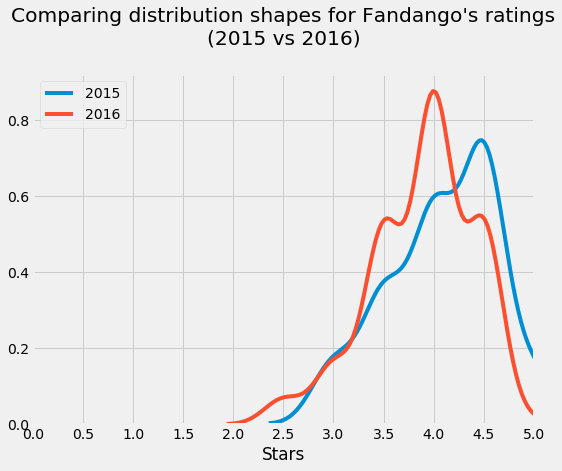

In [15]:
## import module
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns; 
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
ax1=sns.kdeplot(fandango_2015['Fandango_Stars'], legend=True,label='2015')
ax2=sns.kdeplot(fandango_2016['fandango'], legend=True,label='2016')
ax1.set_title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) 
ax1.set_xlabel('Stars')
ax1.set_xlim(0,5)
ax1.set_xticks(arange(0,5.1,0.5))


Two aspects are striking on the figure above:

* Both distributions are strongly left skewed.
* The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

## Comparing Relative Frequencies
It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead (**Relative Frequency**).

In [16]:
## 2015 relative frequency table

print('2015 Relative Frequencies'+ '\n'+'-'*25)
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

2015 Relative Frequencies
-------------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [17]:
## 2016 relative frequency table
print('2016 Relative Frequencies'+ '\n'+'-'*25)
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

2016 Relative Frequencies
-------------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.

### Determining the Direction of the Change
We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics (remember the distinction between sample statistics and population parameters) to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [18]:
## mean in 2015 and 2016
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

print('2015 Mean: '+ str(round(mean_2015,2)))
print('2016 Mean: '+ str(round(mean_2016,2)))

2015 Mean: 4.09
2016 Mean: 3.89


In [19]:
## median in 2015 and 2016
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

print('2015 Median: '+ str(round(median_2015,2)))
print('2016 Median: '+ str(round(median_2016,2)))

2015 Median: 4.0
2016 Median: 4.0


In [20]:
## mode in 2015 and 2016
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

print('2015 Mode: '+ str(round(mode_2015,2)))
print('2016 Mode: '+ str(round(mode_2016,2)))

2015 Mode: 4.5
2016 Mode: 4.0


In [21]:

summary=pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


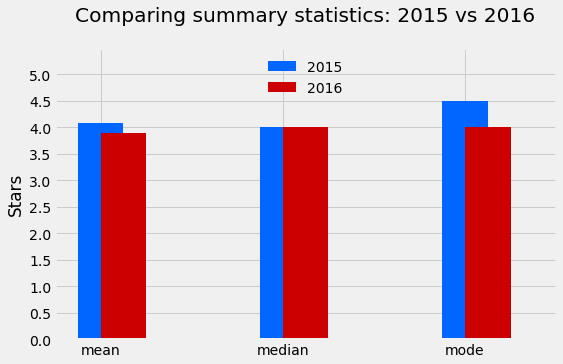

In [22]:
## visualization
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.